# Lab 6 Exercises - Random Forests

One of the possible ways of improving classification performance is by using ensemble methods (i.e. a set of classifiers, each with a vote for a class label; the final class is decided based on a majority vote). Random Forests are an example of an ensemble method. Detailed explanation is available in the lecture.

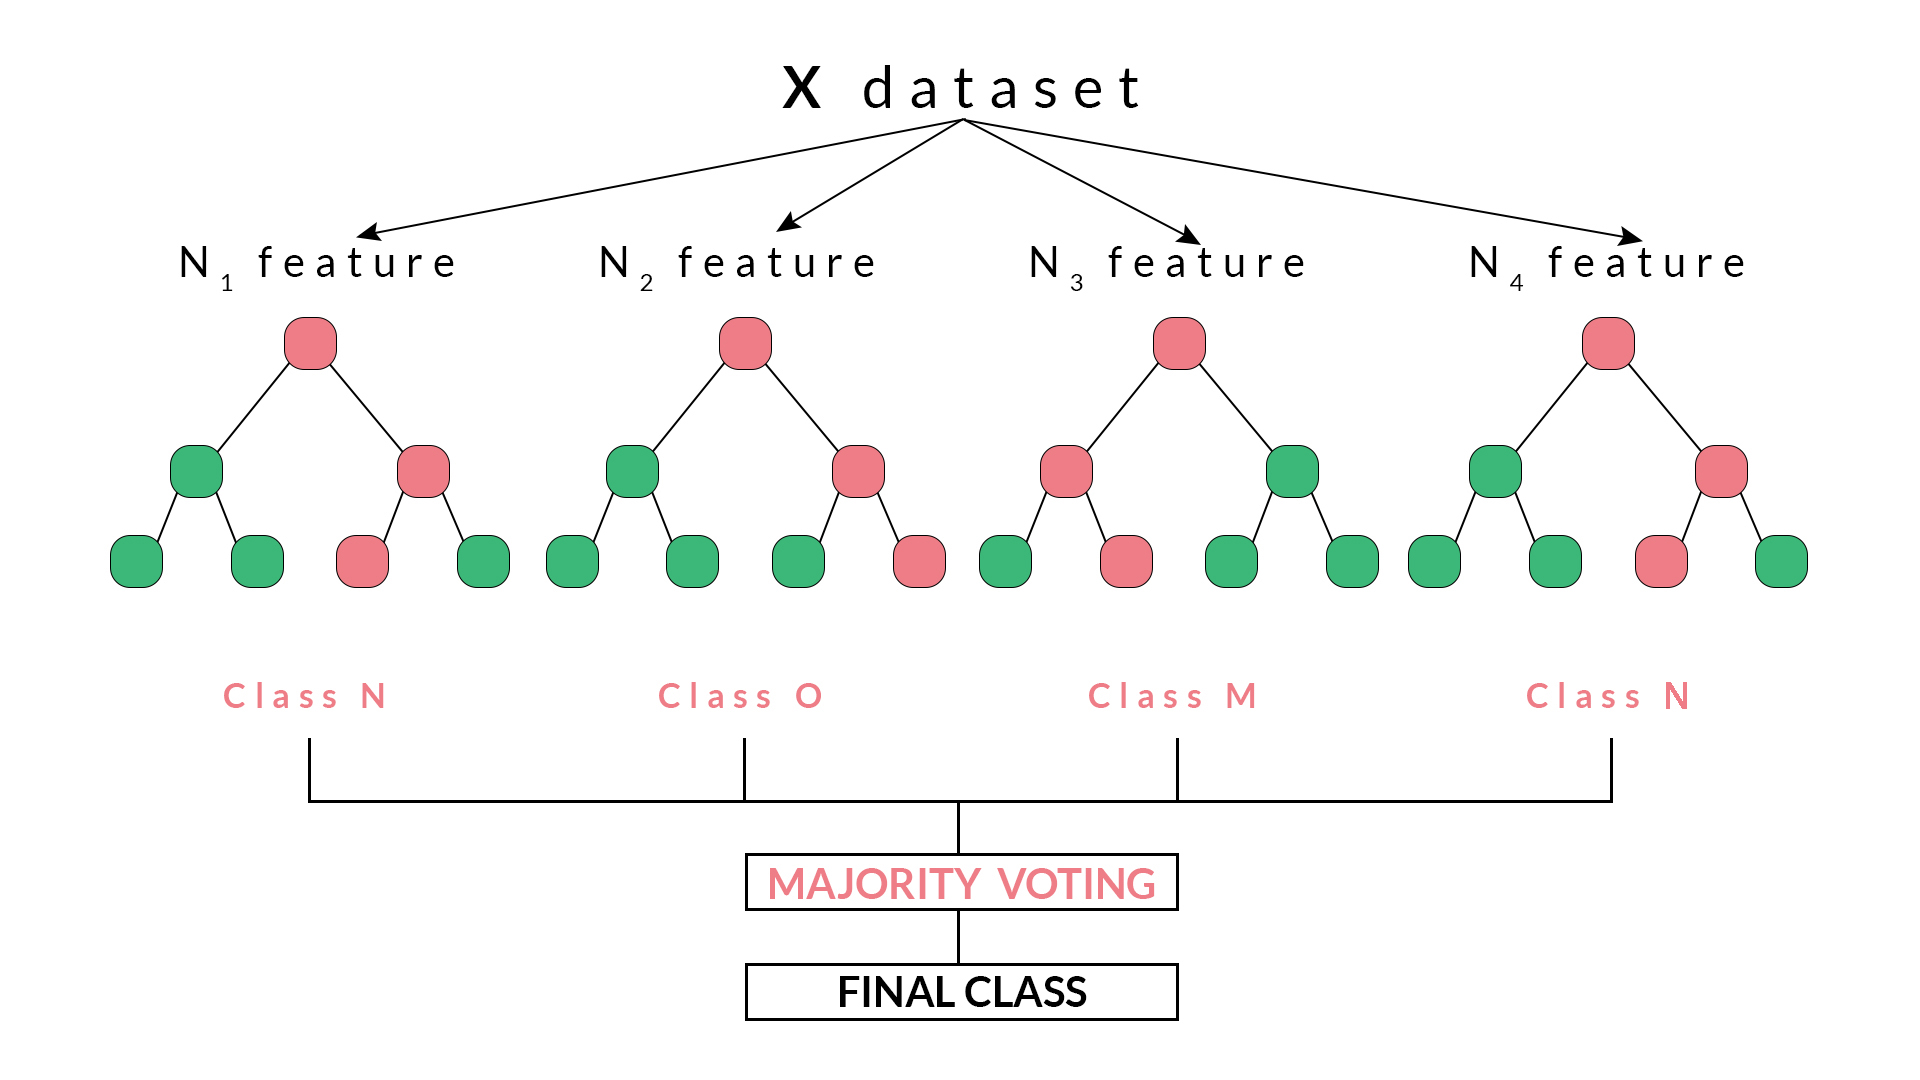

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()  

try:
    df = pd.read_csv('hr_employee_attrition.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/main/data/hr_employee_attrition.csv')

df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
df['Attrition'] = df['Attrition'].astype('category').cat.codes

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


**Plot the correlation matrix using the dataset's numerical attributes**

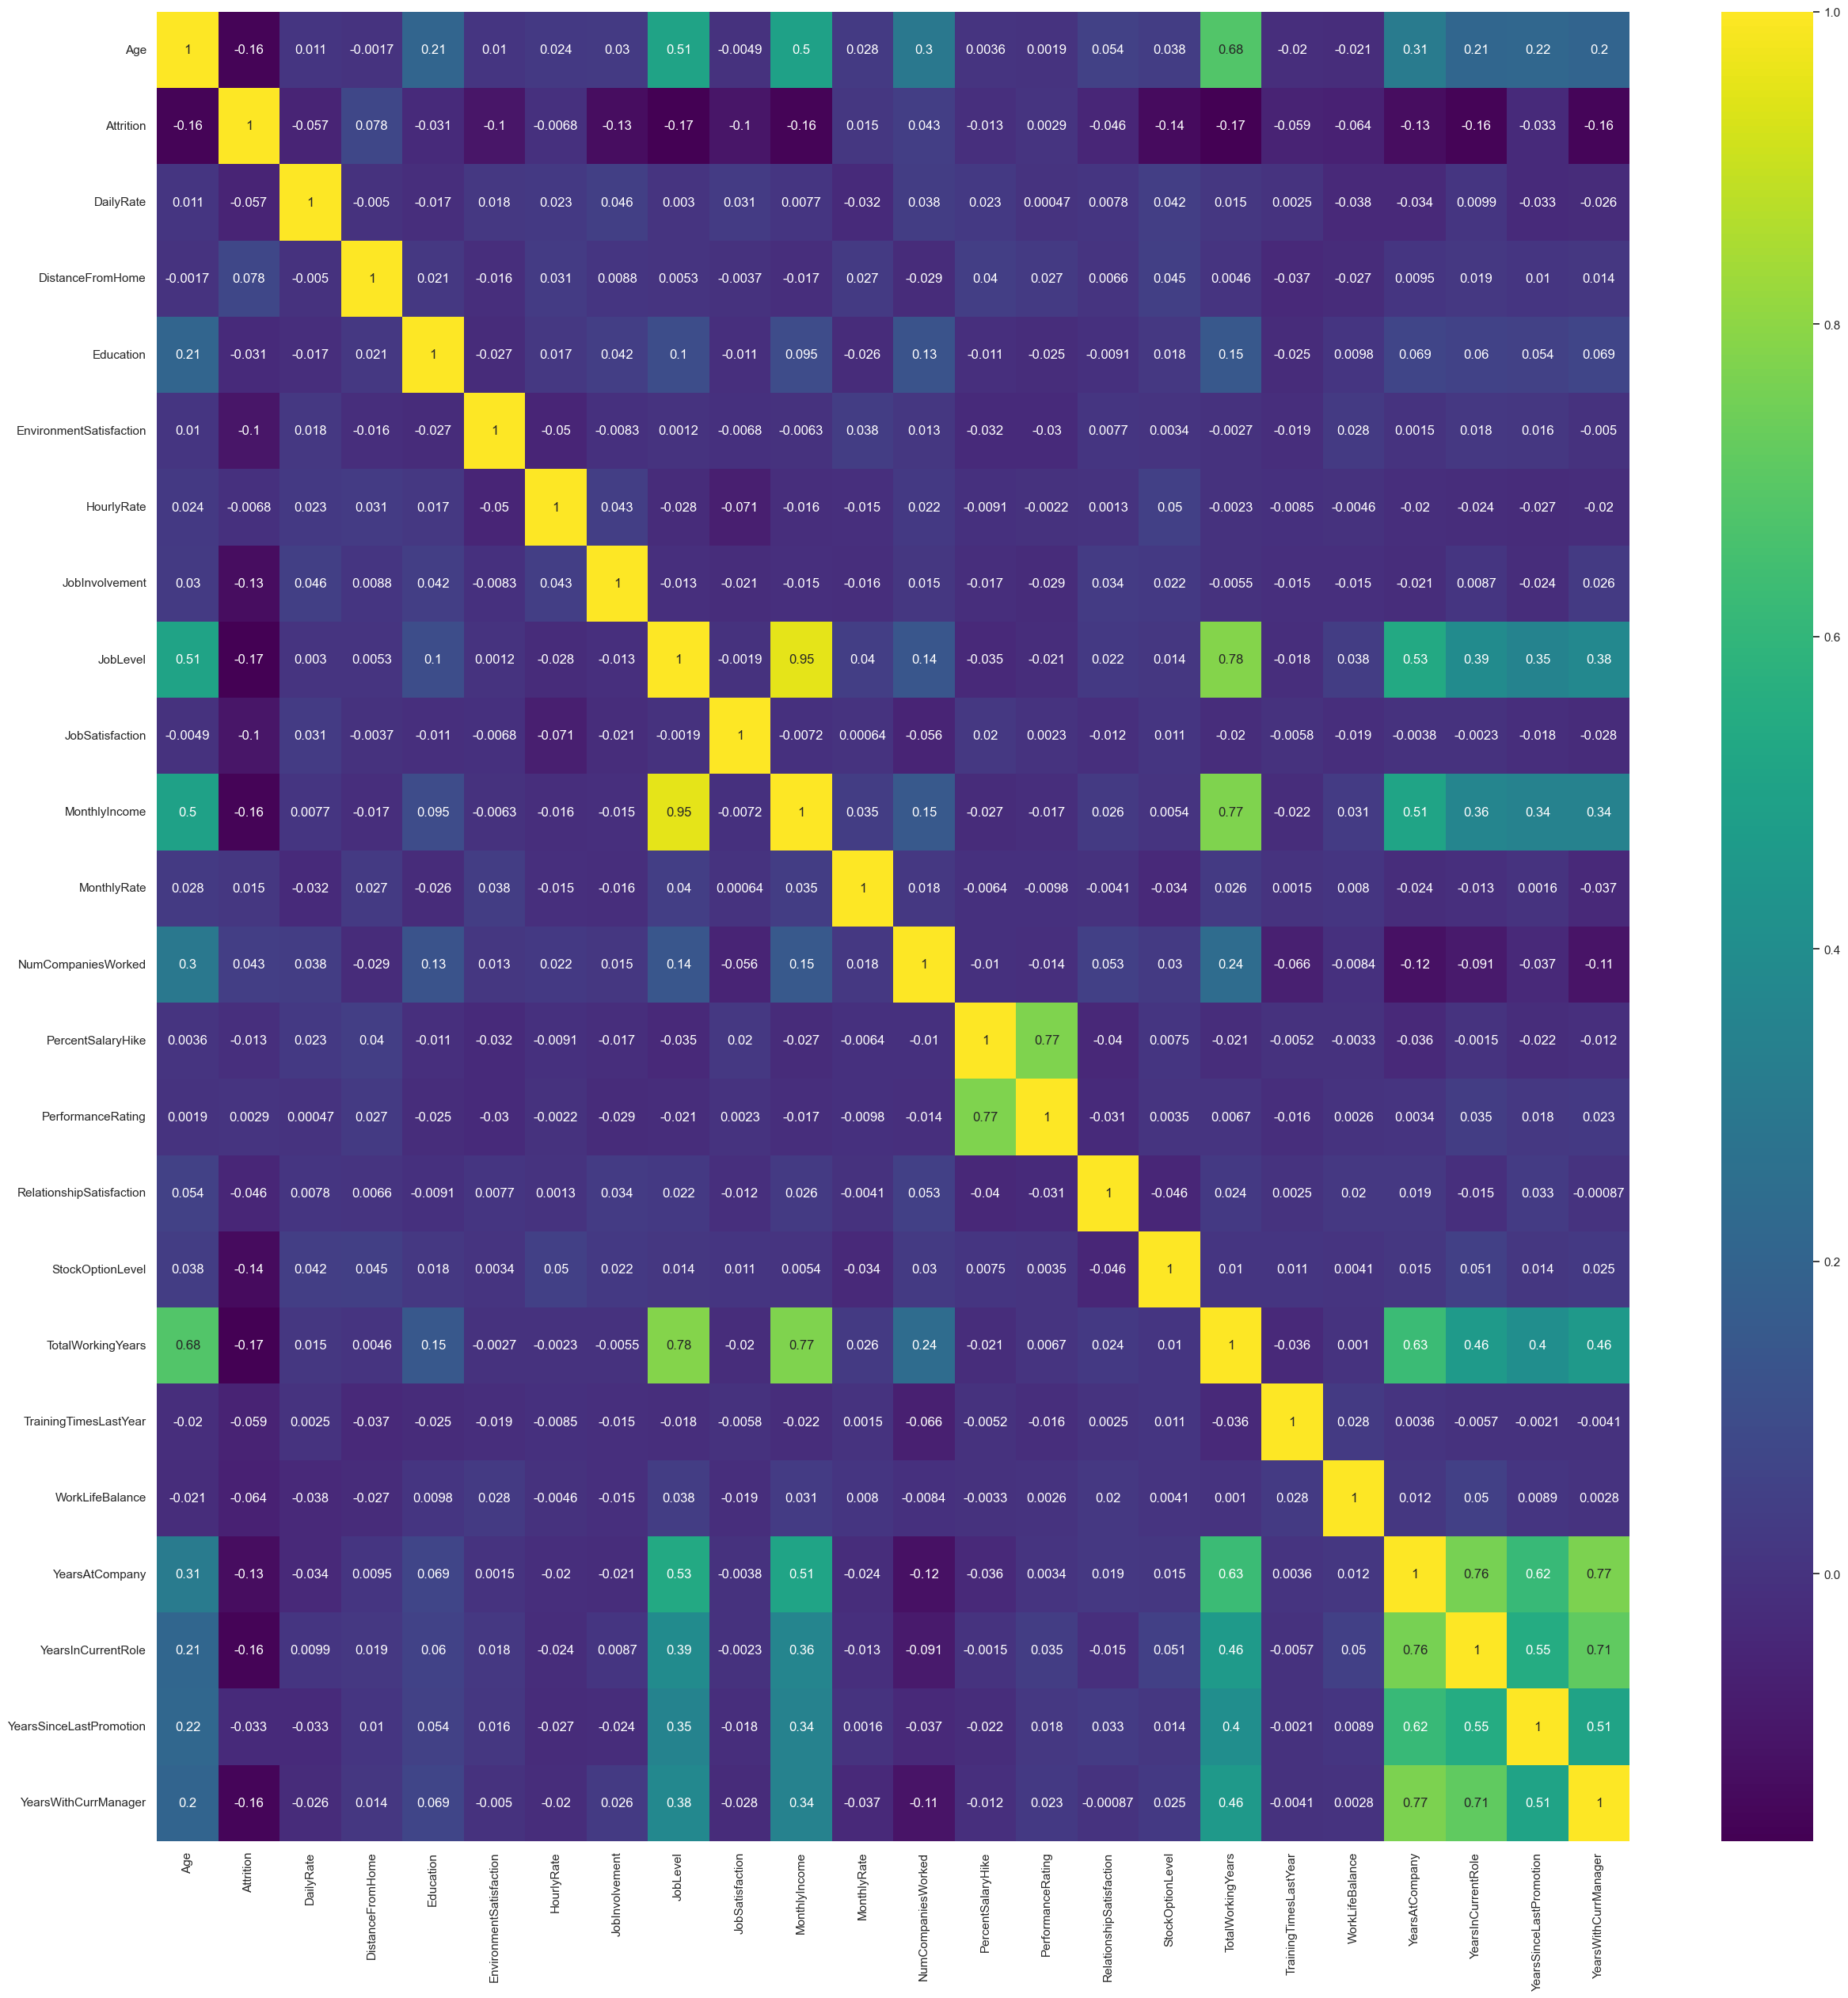

In [2]:
# to improve the plot's clarity, it will be set to a larger size using the line below
plt.figure(figsize=(30,30))

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation
corr = df_numeric.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='viridis', annot=True)
plt.show()

 **Choose and apply an encoding approach for preprocessing the categorical features** (or do both and compare later).

In [3]:
#Let's try both and compare later

In [4]:
#Label Encoding
df_le = df.copy()

categorical_columns = df.select_dtypes(include= [object, 'category'])

for column in categorical_columns:
         df_le[column] = df_le[column].astype('category').cat.codes

df_le

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


**Another Solution**

In [5]:
#Label Encoding
df_le = df.copy()

col = df_le.select_dtypes(include= [object, 'category']).columns
df_le[col]= df_le[col].transform(lambda x: x.astype('category').cat.codes)

df_le

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [6]:
#One Hot Encoding
categorical_columns = df.select_dtypes(include= [object, 'category']).columns
df_ohe = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           dtype='int8')
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int8 
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

**Split the dataset into a training and a testing set**

**Using Label Encoding**

In [7]:
from sklearn.model_selection import train_test_split

X_le = df_le.drop('Attrition', axis=1)
y_le = df_le['Attrition']

X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.3, random_state=42)

**Using One Hot Encoding**

In [8]:
from sklearn.model_selection import train_test_split

X_ohe = df_ohe.drop('Attrition', axis=1)
y_ohe = df_ohe['Attrition']

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.3, random_state=42)

**Import and fit the [random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to the data**

**Using Label Encoding**

In [9]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf_le = RandomForestClassifier(random_state=42)
random_forest_clf_le.fit(X_train_le, y_train_le)

RandomForestClassifier(random_state=42)

**Using One Hot Encoding**

In [10]:
random_forest_clf_ohe = RandomForestClassifier(random_state=42)
random_forest_clf_ohe.fit(X_train_ohe, y_train_ohe)

RandomForestClassifier(random_state=42)

**Plot the confusion matrix using the testing dataset**

**Using Label Encoding**

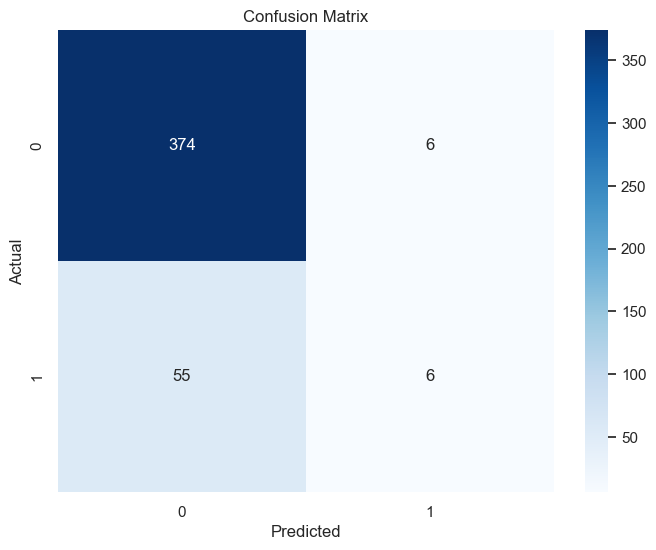

In [11]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_le, random_forest_clf_le.predict(X_test_le))

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=random_forest_clf_le.classes_, yticklabels=random_forest_clf_le.classes_)

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

**Using One Hot Encoding**

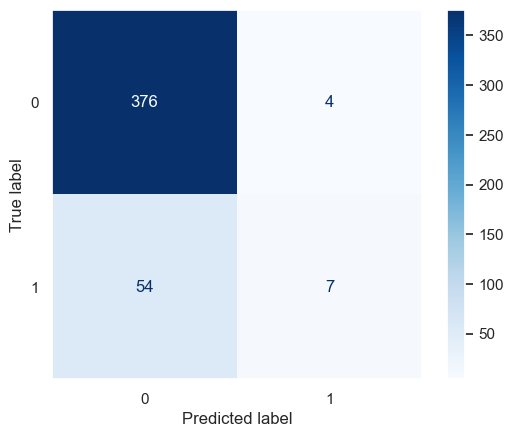

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test_ohe, random_forest_clf_ohe.predict(X_test_ohe))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_clf_ohe.classes_)
disp.plot(cmap='Blues')

# Optional: Turn off grid
plt.grid(False)

# Show the plot
plt.show()

**Calculate the $F_1$ score of the random forest model used**

Compare the $F_1$ score to the baseline decision tree classifier used in the lab notebook.

**Using Label Encoding**

In [13]:
from sklearn.metrics import f1_score

y_pred_le = random_forest_clf_le.predict(X_test_le)
f1_score(y_test_le, y_pred_le)

0.1643835616438356

**Using One Hot Encoding**

In [14]:
from sklearn.metrics import f1_score

y_pred_ohe = random_forest_clf_ohe.predict(X_test_ohe)
f1_score(y_test_ohe, y_pred_ohe)

0.19444444444444445

**Extra Challenge:** Apply the grid search technique from the main lab to find the optimal hyperparameters for the random forest classifier for this data.

Since one-hot encoding has better scores with the default random forest

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [19]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 500, 1000, 1500]
max_features = [ 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

# Include random_state in the params_grid for reproducibility
params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap, 'random_state': [42]}

rf_clf = RandomForestClassifier()

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train_ohe, y_train_ohe)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train_ohe, y_train_ohe)

print_score(rf_clf, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe, train=True)
print_score(rf_clf, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe, train=False)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 85.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.873239   0.466667   0.85941    0.669953      0.817001
recall       0.978947   0.